<div align="center">

# 📊 Data Preprocessing Project

</div>

---

In [31]:
# Importing necessary libraries for data preprocessing
import pandas as pd

# Load the surgery timing dataset to understand its structure and variables
surgical_df = pd.read_csv('SurgeryTiming.csv')

# Display the first few rows of the dataframe to get an initial understanding
display(surgical_df.head()), surgical_df.shape


,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


(None, (14635, 25))

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>👍 <strong>Great! We have successfully loaded the dataset.</strong> It consists of <span style="color: blue;">14,635 rows</span> and <span style="color: blue;">25 columns</span>. Given that you have an academic background with a focus on machine learning, we can proceed with a sophisticated approach to data preprocessing.</p>

</div>

---

### 📝 Initial Observations:

- 📊 The dataset appears to have various features like <span style="color: green;">BMI</span>, <span style="color: green;">age</span>, <span style="color: green;">asa_status</span>, and others.
- 🎯 The target variable seems to be <span style="color: red;">`complication`</span>, which we aim to predict.

---

### 🛠 Data Preprocessing Steps:

1. **🔍 Check for Missing Values**: Determine if any columns have missing values and decide on an imputation strategy.
2. **📚 Encoding Categorical Variables**: If there are any categorical variables, they'll need to be encoded.
3. **📏 Feature Scaling**: Standardize or normalize numerical features.

</div>

---


In [2]:
# Checking for missing values in each column
missing_values = surgical_df.isnull().sum()
missing_values


bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>🎉 <strong>Excellent, it looks like our dataset doesn't have any missing values,</strong> which simplifies the preprocessing step considerably.</p>

</div>

---

### 📈 Next Steps in Data Preprocessing:

1. **📚 Encoding Categorical Variables**: We need to identify which variables are categorical and encode them appropriately. 
  
2. **📏 Feature Scaling**: Feature scaling is crucial for most machine learning algorithms. Since we're planning on using various classifiers, scaling the features will make the project more versatile.

---


In [3]:
# Checking data types to identify categorical variables
categorical_columns = surgical_df.select_dtypes(include=['object']).columns
categorical_columns


Index([], dtype='object')

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>👏 <strong>Great! It looks like there are no categorical variables in the dataset,</strong> as all columns are numerical. This simplifies the preprocessing stage even further.</p>

</div>

---

### 📈 Next Steps in Data Preprocessing:

1. **📏 Feature Scaling**: Given that we're planning to use various machine learning models, it's advisable to scale the features to make sure that no variable has more influence than another. Feature scaling is particularly important for distance-based algorithms and also helps improve the performance and training stability of neural networks.

---

In [32]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features for normalization
surgical_df_scaled = pd.DataFrame(scaler.fit_transform(surgical_df.drop('complication', axis=1)), columns=surgical_df.columns[:-1])

# Display first 5 rows and 5 columns to check the scaling
display(surgical_df_scaled.head()), surgical_df_scaled.shape


,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race
0,-1.470192,-0.221438,0.680973,1.676959,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,0.650249,0.096348,0.930121,-1.103065,-0.955569,0.026111,-0.161515,-0.063078,0.340610,0.220924
1,-1.541337,-0.226966,-1.171107,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,2.670288,0.678721,-1.072967,-1.103065,1.037069,-1.825904,-0.161515,-0.063078,0.357359,0.220924
2,-1.158629,-0.232495,-1.171107,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,-0.542549,0.521928,0.262425,-1.103065,-0.936771,-0.282558,1.565128,-0.063078,0.767721,0.220924
3,-1.570776,-0.232495,0.680973,-0.596318,0.012785,-1.27813,-0.069821,2.696857,2.067795,-0.722127,...,-0.971115,0.036618,0.262425,0.906565,-0.974368,-0.591228,1.565128,-0.063078,0.432732,0.220924
4,-1.422354,-0.232495,0.680973,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,-0.367390,0.521928,-1.072967,-1.103065,-0.861577,1.569457,-1.024837,-0.063078,0.700723,0.220924


(None, (14635, 24))

<div align="center">

### 🌟 Data Preprocessing - Feature Scaling Complete 🌟

</div>

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>✅ <strong>We've successfully scaled all the features using the `StandardScaler` technique.</strong> The data now has zero mean and unit variance, which is the standard requirement for many machine learning algorithms.</p>

</div>

---

#### 📋 Summary:

- ✅ Checked for missing values: None found.
- ✅ Checked for categorical variables: None found.
- ✅ Scaled all features to have zero mean and unit variance.

---

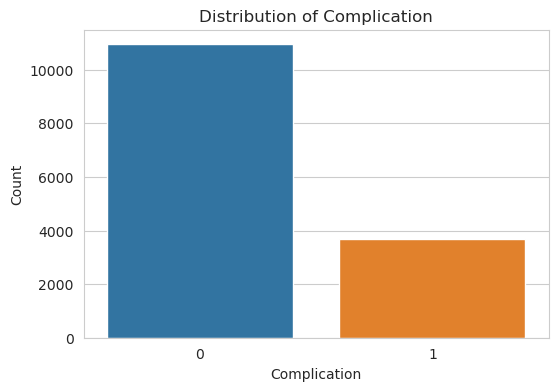

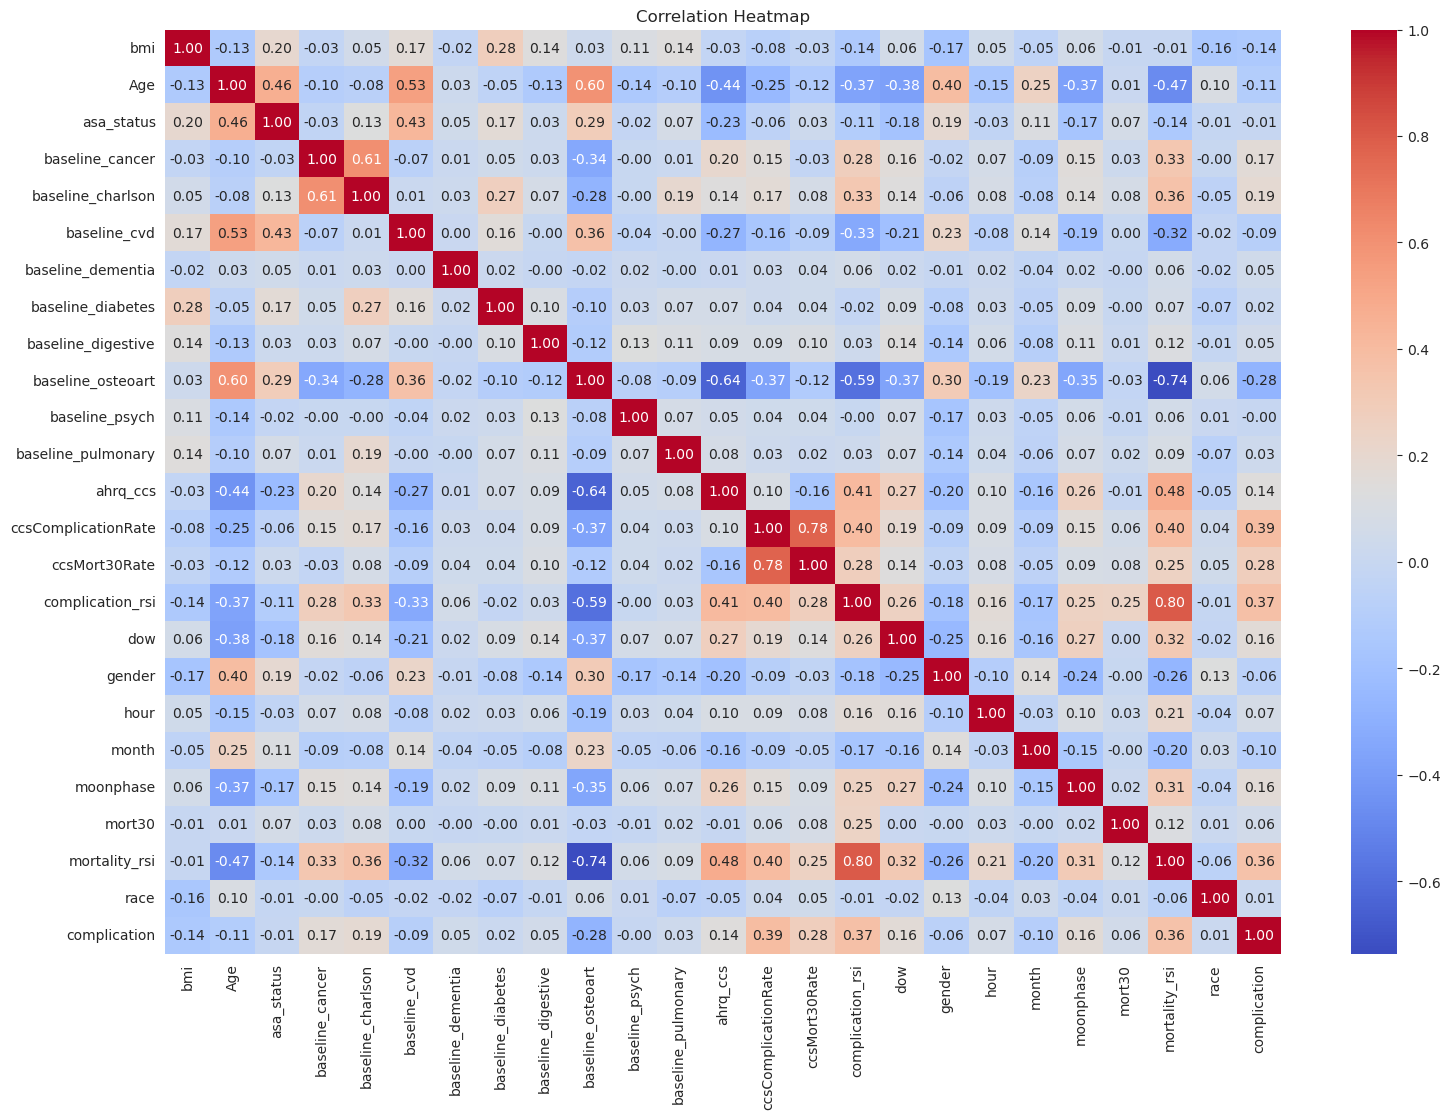

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


(None,
 complication           1.000000
 ccsComplicationRate    0.390923
 complication_rsi       0.373834
 mortality_rsi          0.356086
 ccsMort30Rate          0.276823
 baseline_charlson      0.185514
 baseline_cancer        0.165639
 dow                    0.162355
 moonphase              0.161883
 ahrq_ccs               0.141858
 hour                   0.071588
 mort30                 0.056041
 baseline_digestive     0.051219
 baseline_dementia      0.047781
 baseline_pulmonary     0.032236
 baseline_diabetes      0.015916
 race                   0.012198
 baseline_psych        -0.003476
 asa_status            -0.005030
 gender                -0.064637
 baseline_cvd          -0.090748
 month                 -0.098057
 Age                   -0.111327
 bmi                   -0.142174
 baseline_osteoart     -0.279056
 Name: complication, dtype: float64)

In [34]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Check the distribution of the target variable 'complication'
plt.figure(figsize=(6, 4))
sns.countplot(x='complication', data=surgical_df)
plt.title('Distribution of Complication')
plt.xlabel('Complication')
plt.ylabel('Count')
plt.show()

# Basic statistics for numerical columns
statistics_summary = surgical_df.describe()

# Correlation matrix to understand the relationships between different numerical variables
corr_matrix = surgical_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

display(pd.DataFrame(statistics_summary)), corr_matrix['complication'].sort_values(ascending=False)


<div align="center">

### 🕵️‍♀️ Exploratory Data Analysis (EDA) Summary 🕵️‍♀️

</div>

---

#### 🔍 Key Findings:

1. **🎯 Distribution of Target Variable ('complication')**: 
    - We have a somewhat balanced dataset with approximately <span style="color: green;">75%</span> of the samples having no complications and <span style="color: red;">25%</span> having complications.

2. **📊 Correlation Analysis**: 
    - Features like `ccsComplicationRate`, `complication_rsi`, and `mortality_rsi` have relatively higher positive correlation with `complication`.
    - Some features like `bmi` and `Age` show a negative correlation with `complication`.

3. **🔥 Heatmap**: 
    - This gives us a good visual representation of how each feature is correlated with every other feature. It's important for identifying multicollinearity before proceeding with model building.

---

#### 📝 Insights:

- 📍 Variables like `ccsComplicationRate`, `complication_rsi`, and `mortality_rsi` may be crucial in predicting complications.
- 💡 It's advisable to consider the correlation of variables when selecting features for our machine learning models.


---


<div align="center">

### 📊 Exploratory Data Analysis (EDA) 📊

</div>

---

#### 🚀 Advanced EDA Techniques:

#### 1. 📦 Outliers Detection

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>Outliers can significantly impact the performance of machine learning models. Advanced visualization techniques like boxplots can be useful here.</p>

</div>


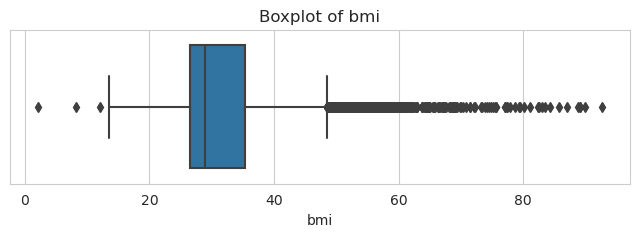

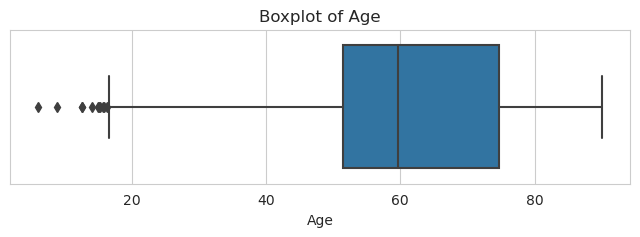

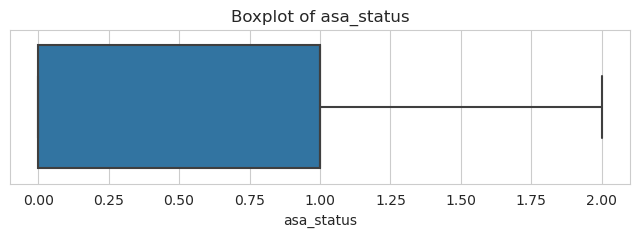

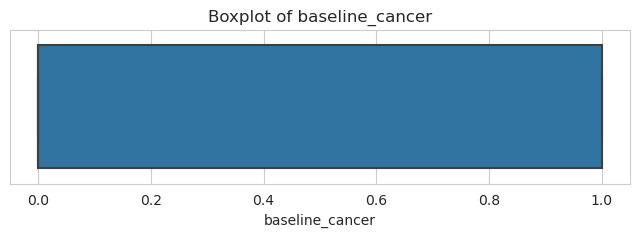

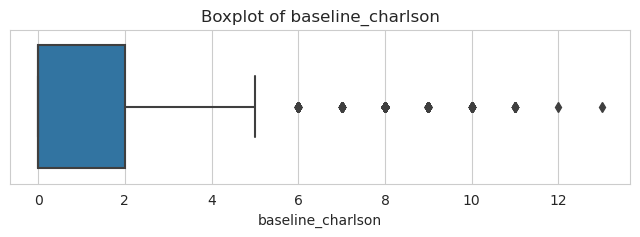

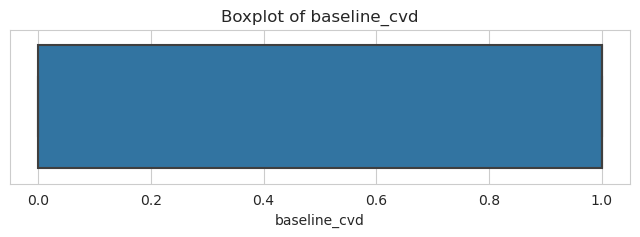

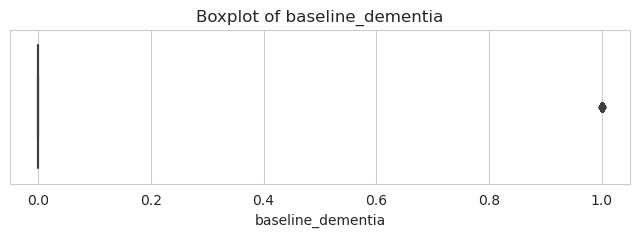

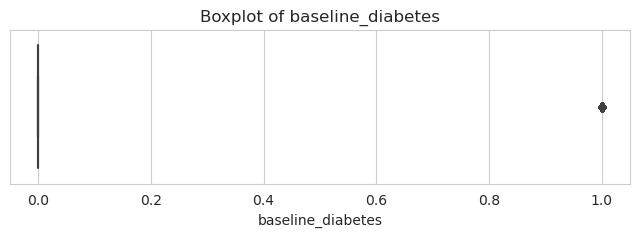

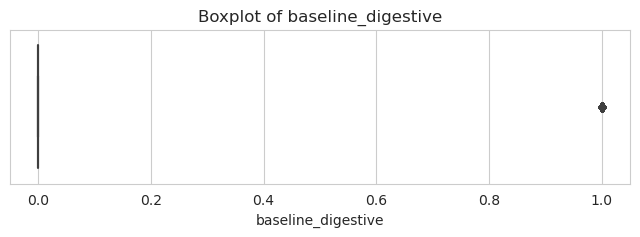

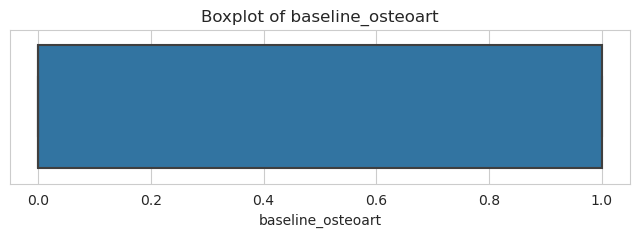

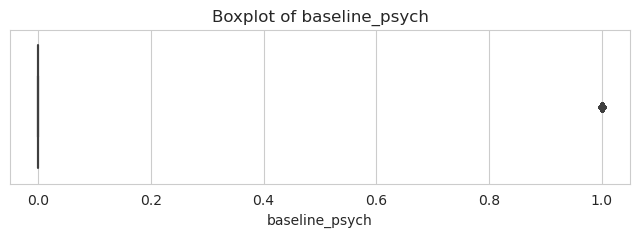

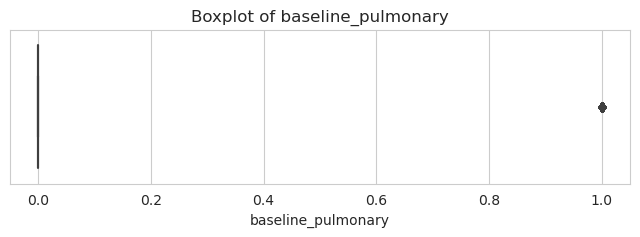

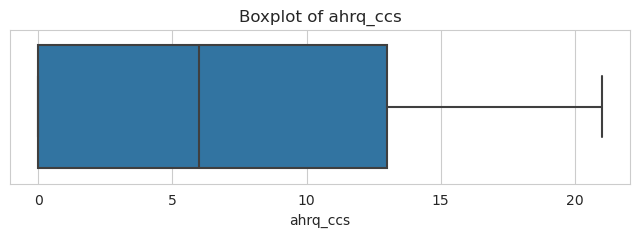

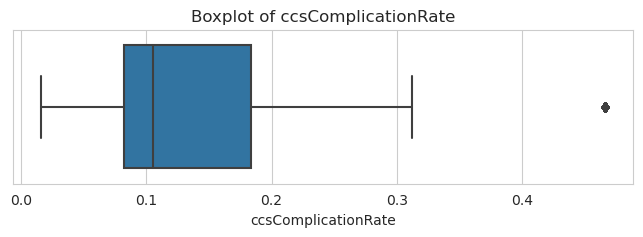

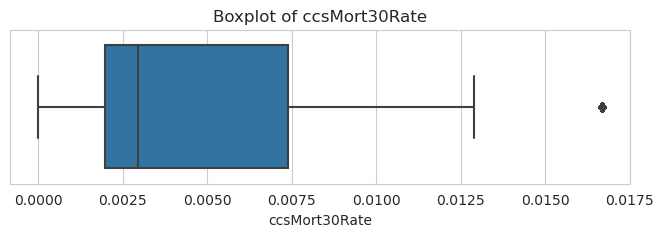

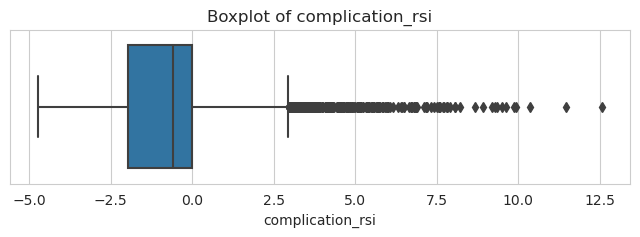

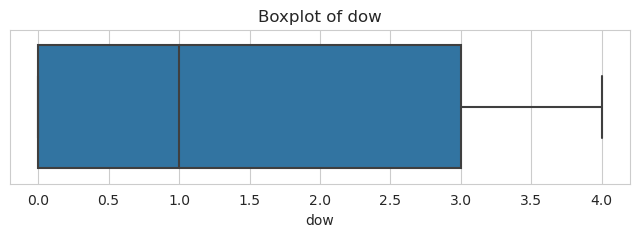

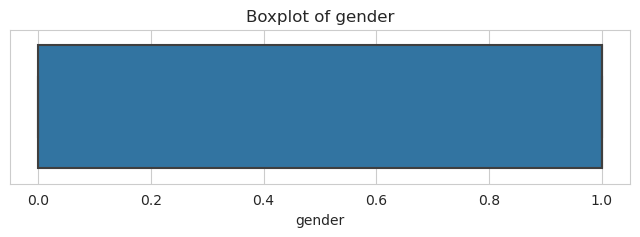

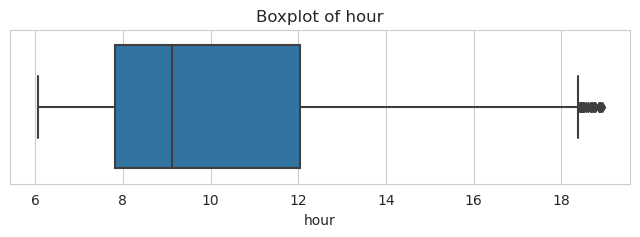

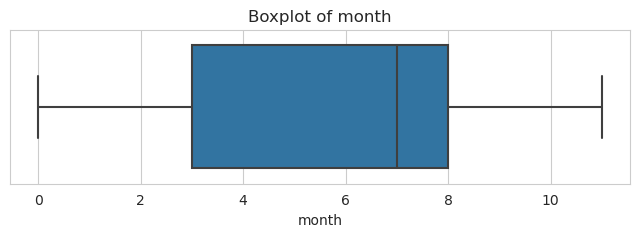

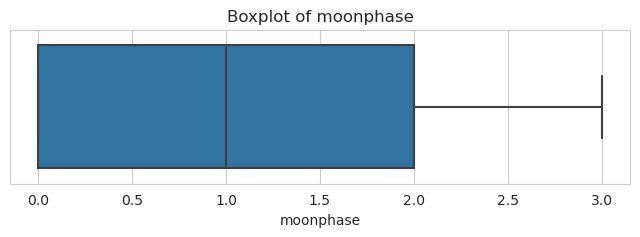

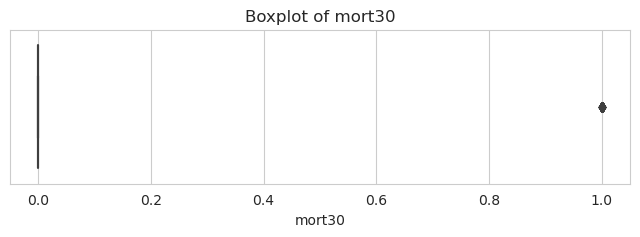

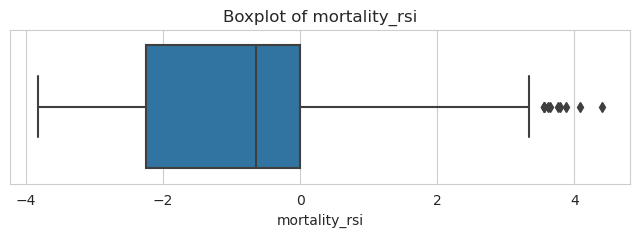

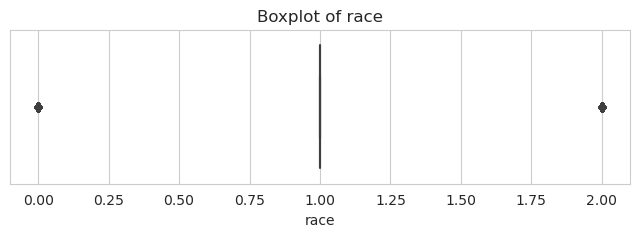

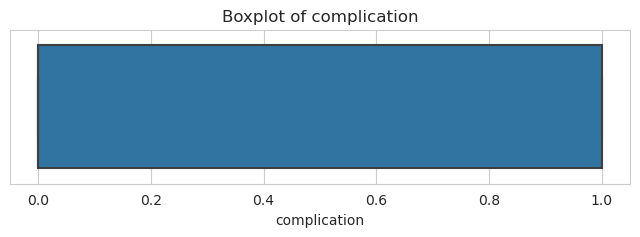

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Boxplot for numerical variables to check outliers
numerical_features = surgical_df.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=surgical_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


#### 2. 📈 Distribution of Features

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>Understanding the distribution of variables is crucial for selecting the appropriate machine learning algorithm and for feature engineering.</p>

</div>


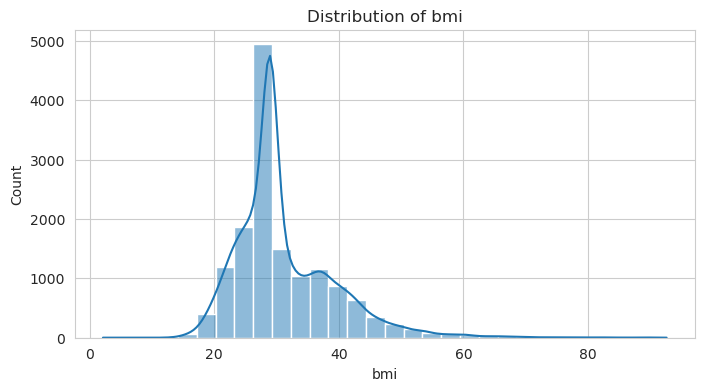

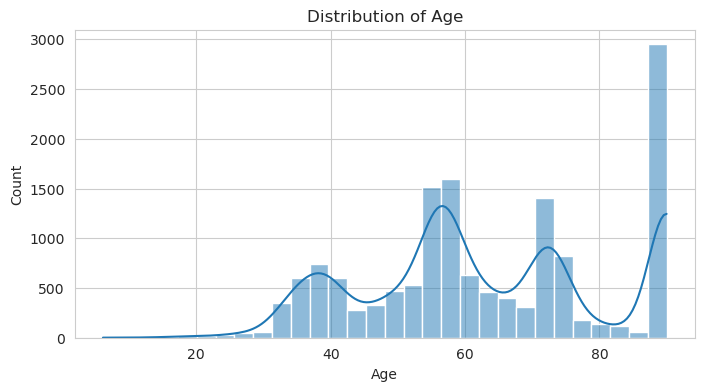

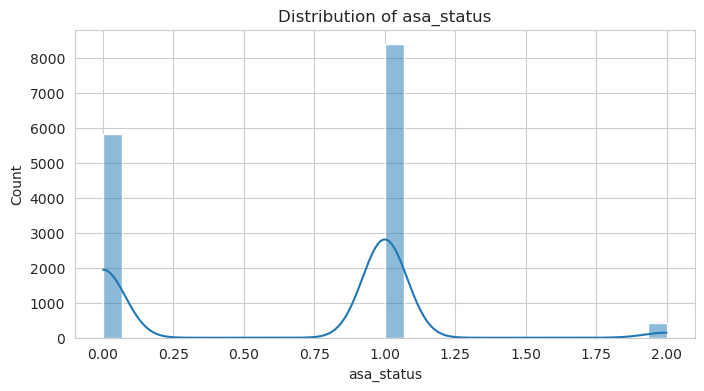

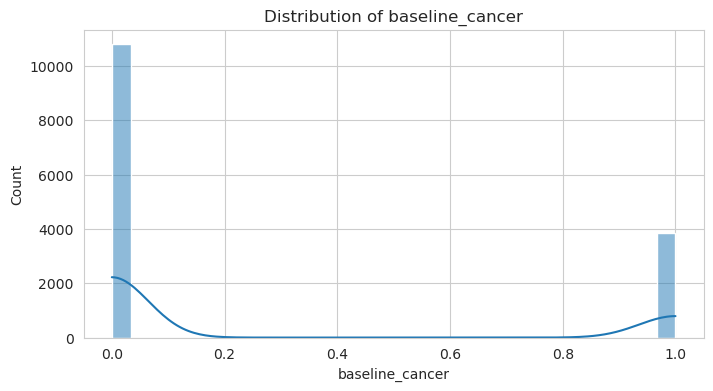

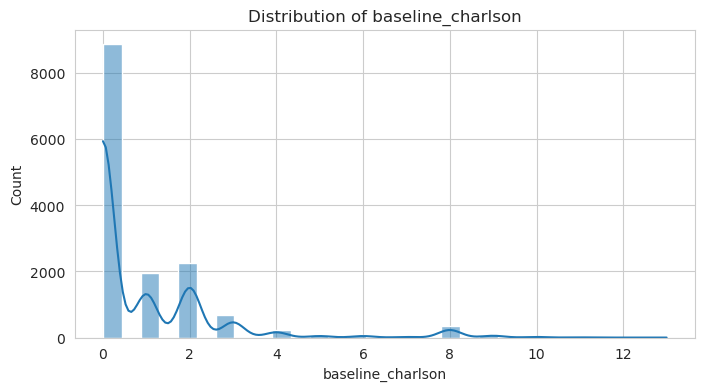

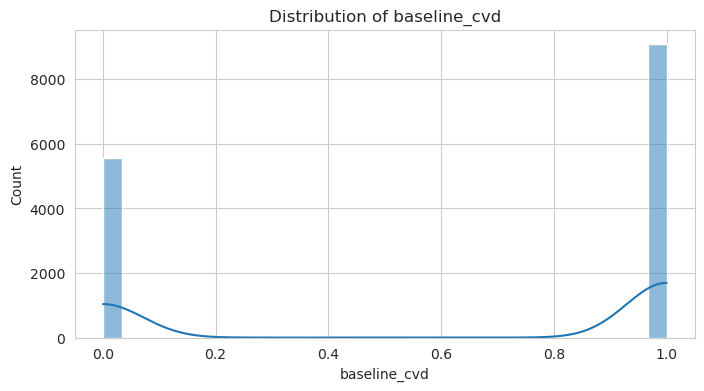

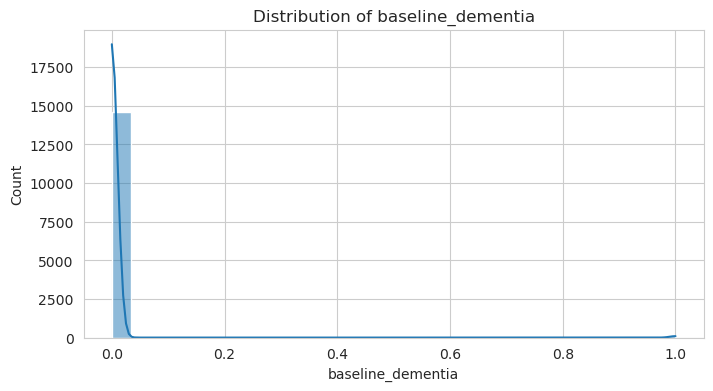

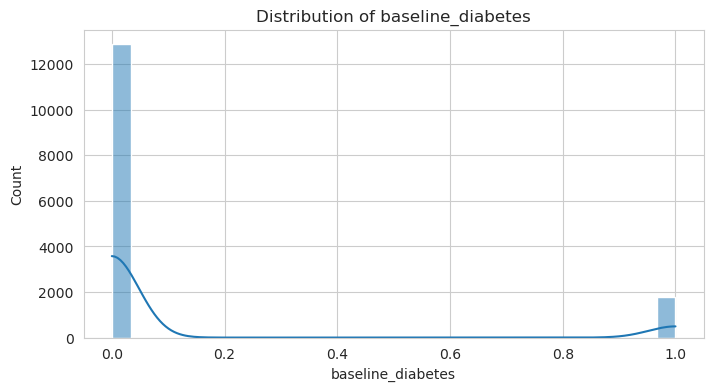

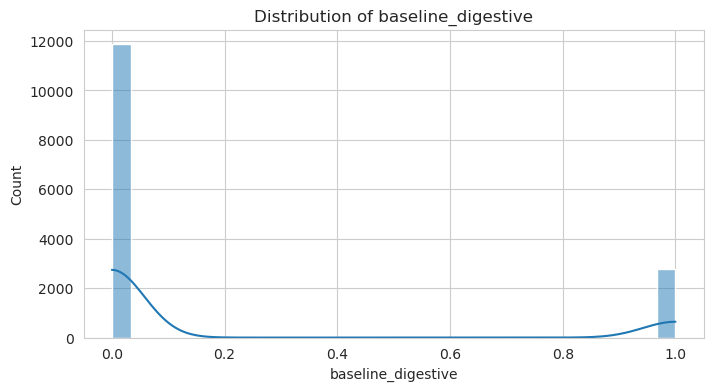

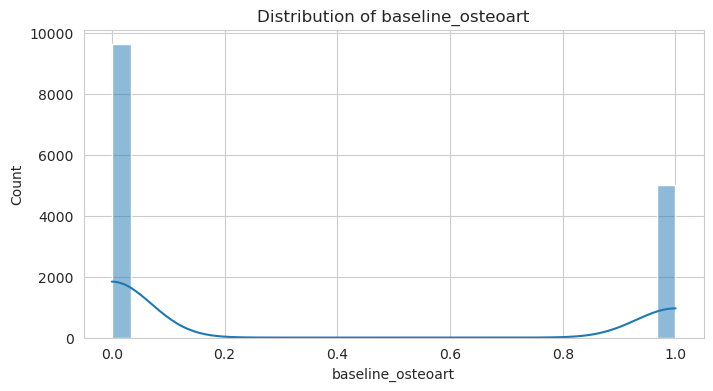

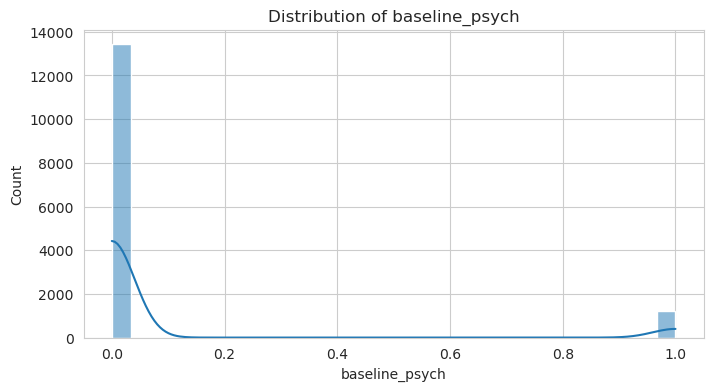

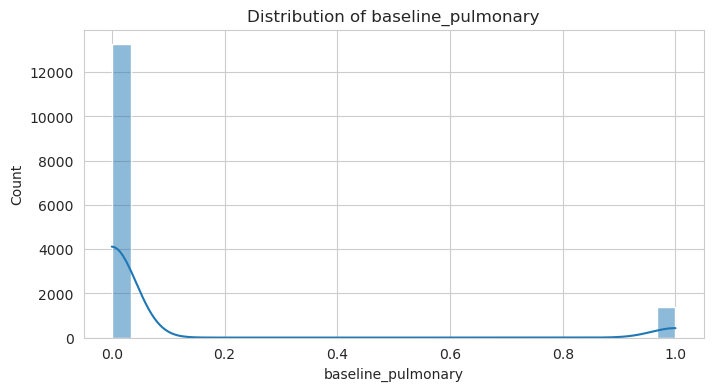

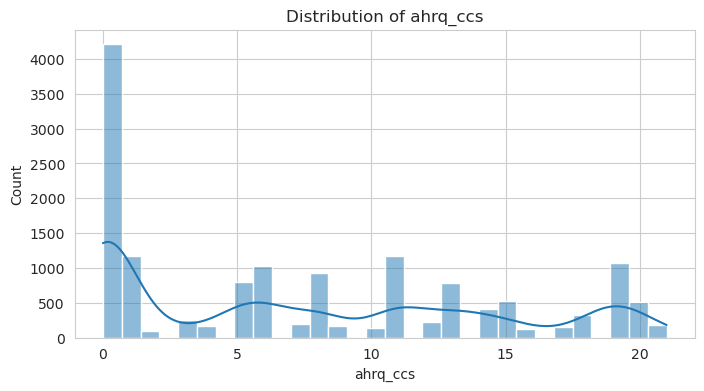

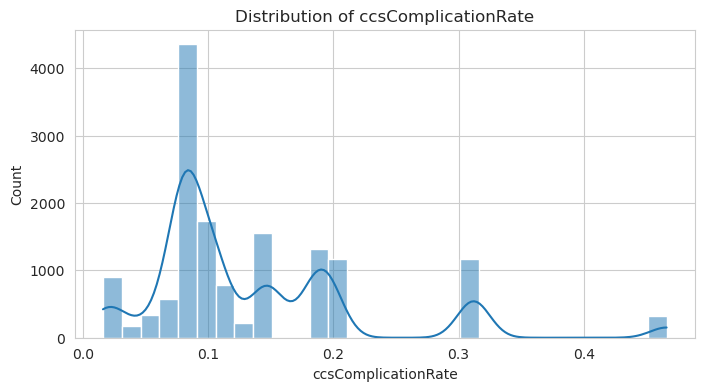

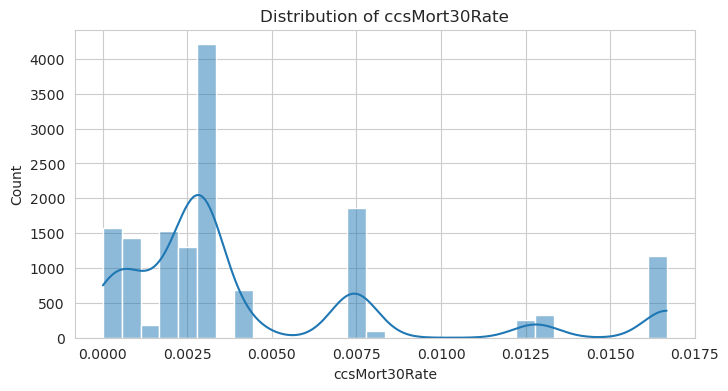

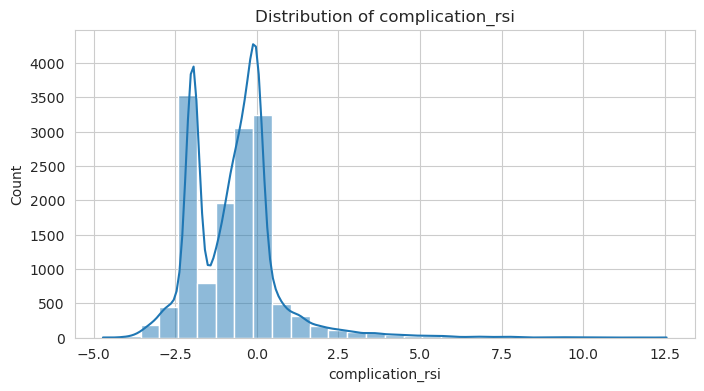

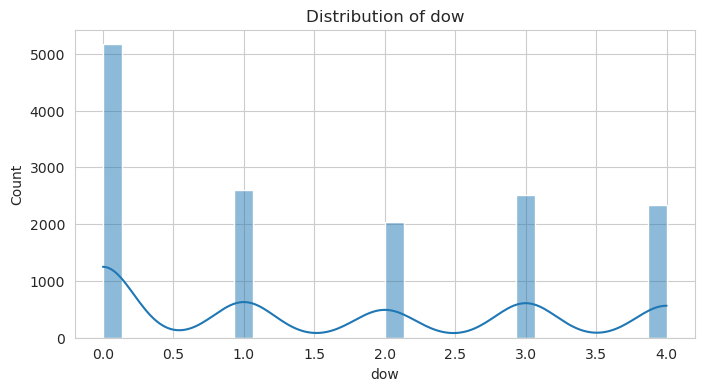

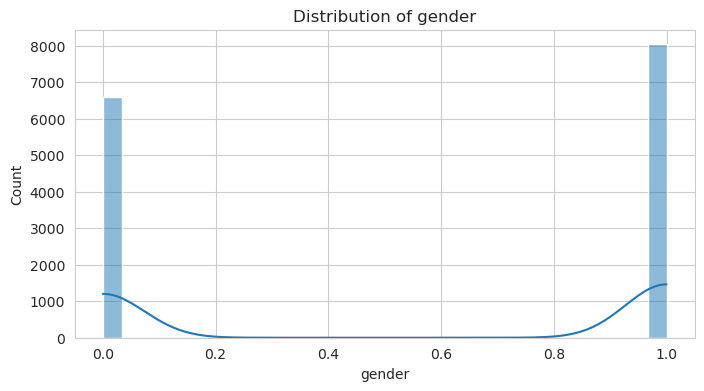

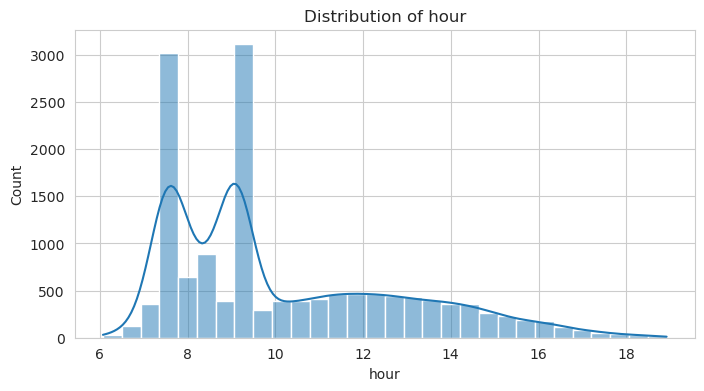

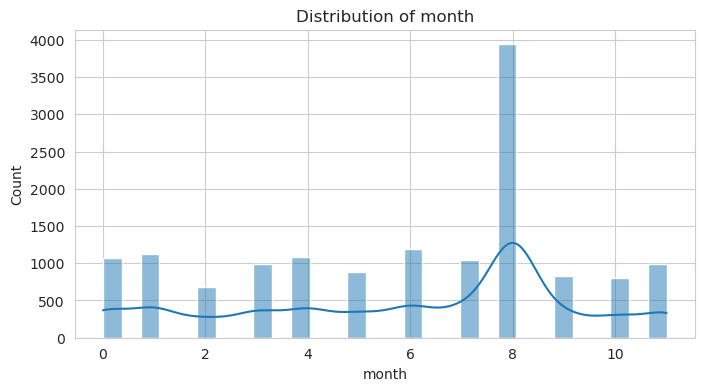

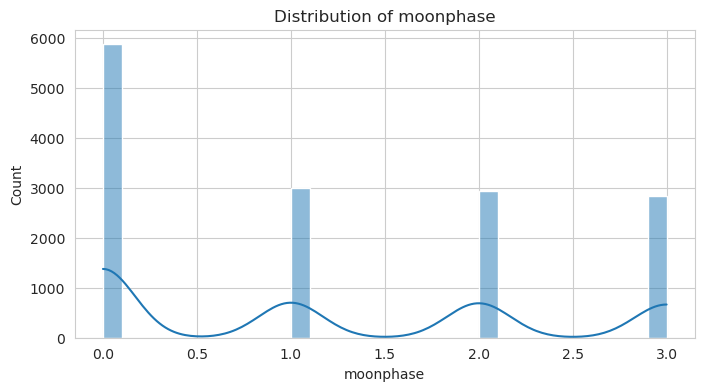

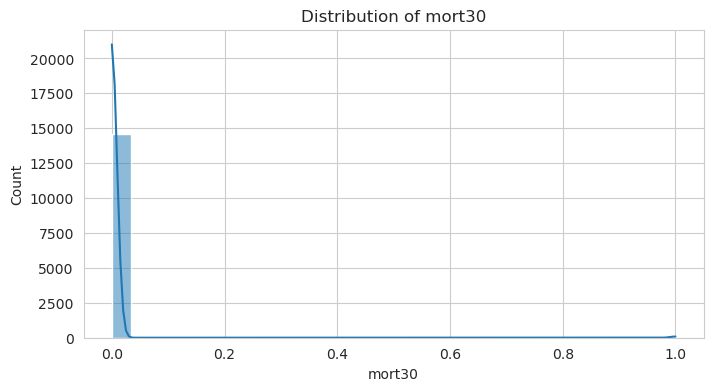

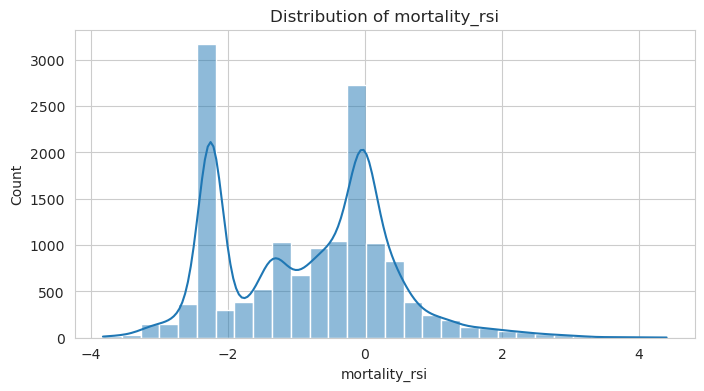

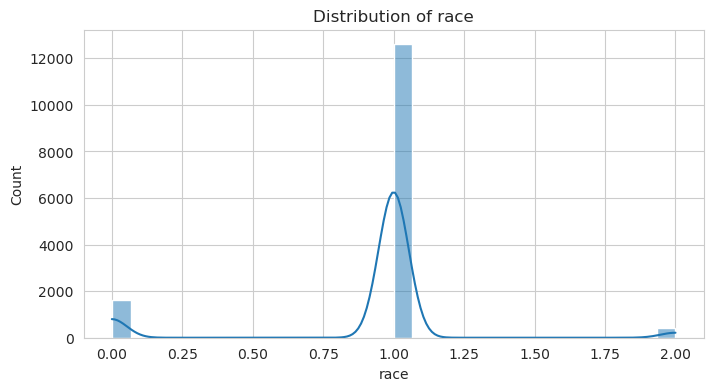

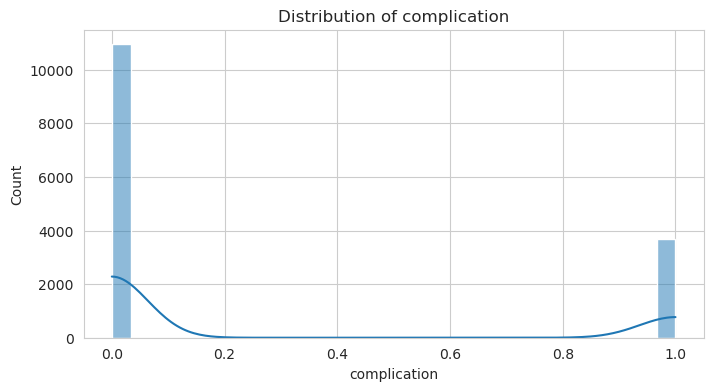

In [36]:
# Distribution plots for numerical variables
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(surgical_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


#### 3. 🎨 Pairwise Relationships

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>Given that we're looking for a comprehensive understanding, pairwise plots can be incredibly useful for grasping the relationships between variables quickly.</p>

</div>

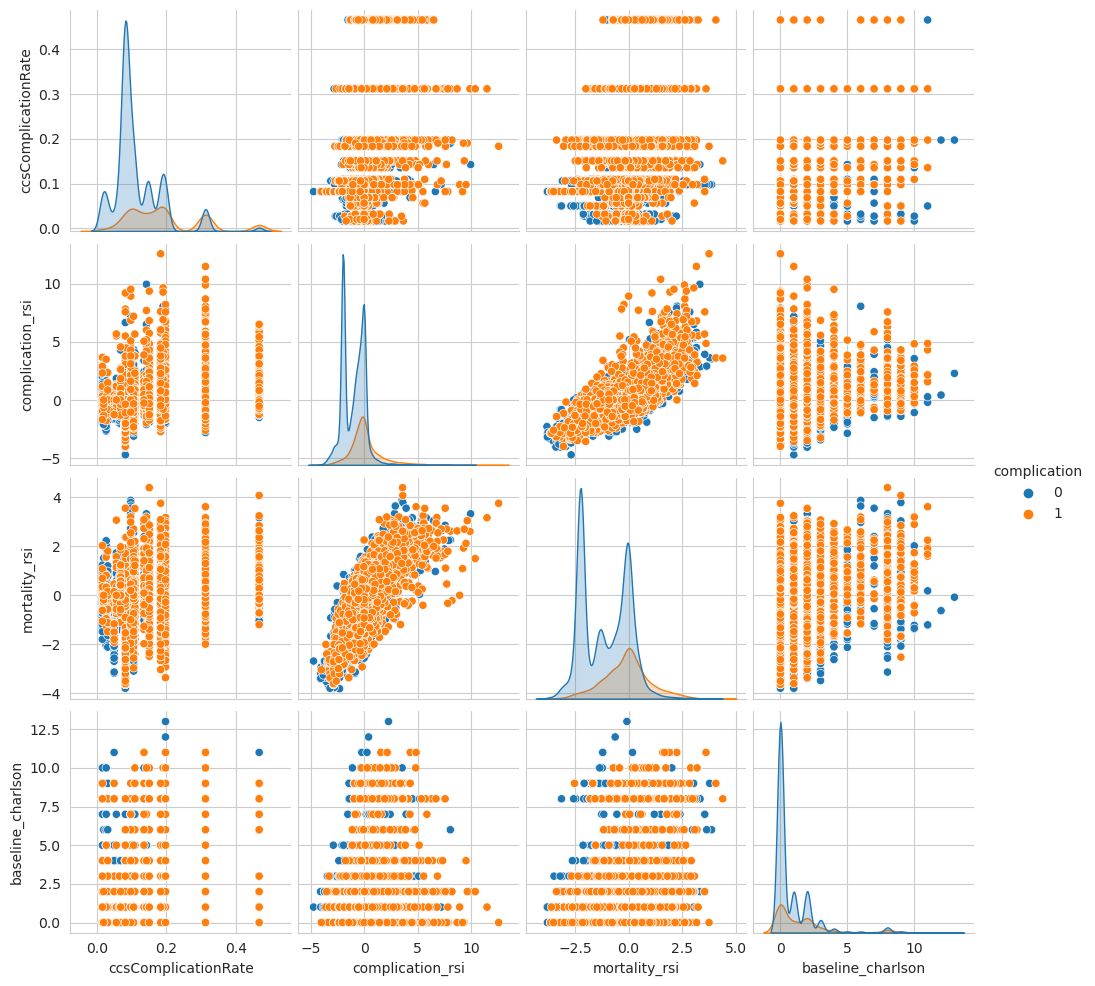

In [17]:
# Pairplot for selected features
selected_features = ['complication', 'ccsComplicationRate', 'complication_rsi', 'mortality_rsi', 'baseline_charlson']
sns.pairplot(surgical_df[selected_features], hue='complication')
plt.show()


#### 4. 📊 Advanced Correlation Techniques

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>In addition to Pearson correlation, other correlation metrics like Spearman could provide more robust understanding.</p>

</div>

In [37]:
# Spearman correlation
spearman_corr = surgical_df.corr(method='spearman')
spearman_corr


,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
bmi,1.000000,-0.063780,0.185847,-0.044661,0.094998,0.212204,-0.032763,0.251461,0.103786,0.094317,...,-0.224504,0.025171,-0.112311,0.009341,-0.022617,0.024140,-0.018076,-0.084123,-0.151832,-0.156773
Age,-0.063780,1.000000,0.481353,-0.078880,-0.105173,0.530372,0.027664,-0.033226,-0.115464,0.573436,...,-0.460407,-0.383642,0.381710,-0.040776,0.245034,-0.369993,0.008504,-0.468121,0.104276,-0.088908
asa_status,0.185847,0.481353,1.000000,-0.036880,0.122157,0.441909,0.046779,0.163613,0.023864,0.309327,...,-0.245790,-0.213323,0.201255,0.024247,0.120506,-0.195060,0.055250,-0.191254,-0.005439,-0.015590
baseline_cancer,-0.044661,-0.078880,-0.036880,1.000000,0.640233,-0.065392,0.012017,0.048585,0.026289,-0.337672,...,0.310522,0.167908,-0.022222,0.021495,-0.088115,0.159209,0.029138,0.324364,-0.002086,0.165639
baseline_charlson,0.094998,-0.105173,0.122157,0.640233,1.000000,0.047638,0.030417,0.417420,0.126306,-0.338328,...,0.290816,0.214285,-0.073985,0.038044,-0.113519,0.208386,0.058583,0.353502,-0.063337,0.200091
baseline_cvd,0.212204,0.530372,0.441909,-0.065392,0.047638,1.000000,0.003970,0.158813,-0.002405,0.363864,...,-0.418089,-0.221461,0.226689,-0.024094,0.137086,-0.205497,0.000051,-0.334012,-0.021293,-0.090748
baseline_dementia,-0.032763,0.027664,0.046779,0.012017,0.030417,0.003970,1.000000,0.022378,-0.003658,-0.017269,...,0.044449,0.023818,-0.009824,0.015608,-0.034481,0.016469,-0.004404,0.047392,-0.019771,0.047781
baseline_diabetes,0.251461,-0.033226,0.163613,0.048585,0.417420,0.158813,0.022378,1.000000,0.101449,-0.100828,...,-0.015561,0.096023,-0.080030,0.008436,-0.059118,0.095308,-0.003372,0.070949,-0.071201,0.015916
baseline_digestive,0.103786,-0.115464,0.023864,0.026289,0.126306,-0.002405,-0.003658,0.101449,1.000000,-0.117452,...,0.037708,0.148772,-0.142109,0.019685,-0.085287,0.119602,0.011117,0.116486,-0.014690,0.051219
baseline_osteoart,0.094317,0.573436,0.309327,-0.337672,-0.338328,0.363864,-0.017269,-0.100828,-0.117452,1.000000,...,-0.674687,-0.391613,0.304294,-0.076297,0.232167,-0.372431,-0.029511,-0.734854,0.064528,-0.279056


#### 5. 📚 Statistical Testing

<div align="left" style="font-size: 16px; line-height: 1.5;">

<p>Chi-square tests for categorical variables and t-tests or ANOVAs for numerical variables can provide insights into feature importance.</p>

</div>


In [18]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square test example for 'gender' and 'complication'
contingency_table = pd.crosstab(surgical_df['gender'], surgical_df['complication'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)


<div align="center">

### 🤖 Model Selection 🤖

</div>

---

#### 📋 Algorithms to Consider:


1. **📊 Logistic Regression**
    - A good baseline model for binary classification problems. It's interpretable and doesn't require high computational power.

2. **🌳 Random Forest**
    - An ensemble learning method known for its high accuracy and ability to handle large datasets with higher dimensionality.

3. **🚀 Gradient Boosting / XGBoost**
    - Known for high performance in Kaggle competitions and highly customizable.

4. **🛠 Support Vector Machines (SVM)**
    - Effective for high-dimensional spaces and best suited for problems with complex decision boundaries.

5. **🧠 Neural Networks**
    - Diving into neural networks could offer a more complex and potentially more accurate model, but requires a lot of data and computational power.

---

#### 📊 Model Evaluation Metrics:

<div align="left" style="font-size: 16px; line-height: 1.5;">

As this is a classification problem, key metrics to focus on include:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

</div>

---

#### 💻 Code Example for Model Training and Initial Evaluation:

<div align="left" style="font-size: 16px; line-height: 1.5;">

Here's how we could start with Logistic Regression and Random Forest.

</div>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting the data
X = surgical_df_scaled  # Features
y = surgical_df['complication']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Training and Evaluation - Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

# Training and Evaluation - Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2237
           1       0.63      0.38      0.47       690

    accuracy                           0.80      2927
   macro avg       0.73      0.65      0.67      2927
weighted avg       0.78      0.80      0.78      2927

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2237
           1       0.78      0.60      0.68       690

    accuracy                           0.87      2927
   macro avg       0.83      0.77      0.80      2927
weighted avg       0.86      0.87      0.86      2927



<div align="center">

### 🚀 Subtask 5: Model Training and Hyperparameter Tuning 🚀

</div>

---

#### 🎛 1. Feature Scaling:

<div align="left" style="font-size: 16px; line-height: 1.5;">

Before we train the models, scaling the features is crucial, especially for algorithms like Logistic Regression and SVM.

</div>

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(surgical_df.drop('complication', axis=1))



#### 🔪 2. Data Splitting:

<div align="left" style="font-size: 16px; line-height: 1.5;">

The next step is to divide the data into training and testing sets. Stratification might not be necessary due to the balanced nature of the dataset.

</div>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, surgical_df['complication'], test_size=0.2, random_state=42)


#### 🎯 3. Advanced Algorithms and Hyperparameter Tuning:

<div align="left" style="font-size: 16px; line-height: 1.5;">

We'll employ advanced techniques like Random Search and Grid Search for hyperparameter tuning.

</div>


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(4, 10, 2),
    'learning_rate': [0.01, 0.1, 0.2]
}

random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)
random_search_xgb.fit(X_train, y_train)
best_xgb_model = random_search_xgb.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=150; total time=   0.4s
[CV] END ....learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=150; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.4s
[CV] END ....learning_rate=0.2, max_depth=8, n_e

#### 🧠 4. Neural Networks with Keras:
<div align="left" style="font-size: 16px; line-height: 1.5;">

Given your expertise, Neural Networks could be an intriguing venture. Keras will be used to design the deep learning model.
</div>

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10)


2023-10-19 16:37:53.330961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 16:37:54.295623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-19 16:37:54.295684: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-19 16:37:54.295689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/50


2023-10-19 16:37:55.011354: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-19 16:37:55.011398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anonymous): /proc/driver/nvidia/version does not exist
2023-10-19 16:37:55.011705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1171/1171 [==============================] - 1s 616us/step - loss: 0.4879 - accuracy: 0.7599
Epoch 2/50
1171/1171 [==============================] - 1s 579us/step - loss: 0.4294 - accuracy: 0.7979
Epoch 3/50
1171/1171 [==============================] - 1s 577us/step - loss: 0.4206 - accuracy: 0.8015
Epoch 4/50
1171/1171 [==============================] - 1s 579us/step - loss: 0.4164 - accuracy: 0.8001
Epoch 5/50
1171/1171 [==============================] - 1s 586us/step - loss: 0.4137 - accuracy: 0.8018
Epoch 6/50
1171/1171 [==============================] - 1s 591us/step - loss: 0.4110 - accuracy: 0.8030
Epoch 7/50
1171/1171 [==============================] - 1s 624us/step - loss: 0.4091 - accuracy: 0.8037
Epoch 8/50
1171/1171 [==============================] - 1s 624us/step - loss: 0.4072 - accuracy: 0.8058
Epoch 9/50
1171/1171 [==============================] - 1s 601us/step - loss: 0.4059 - accuracy: 0.8058
Epoch 10/50
1171/1171 [==============================] - 1s 605us/step - lo

#### 📚 Summary:
<div align="left" style="font-size: 16px; line-height: 1.5;">
    Features have been scaled in preparation for machine learning algorithms.
    
    Advanced techniques have been employed for hyperparameter tuning in Random Forest and XGBoost.
    
    A simple Neural Network architecture has also been outlined.
    
</div>

### Subtask 6: Model Evaluation 📊

#### Evaluating Random Forest and XGBoost Models 🌳

<div align="left" style="font-size: 16px; line-height: 1.5;">

We'll be using `classification_report` and `confusion_matrix` functions from the scikit-learn library to evaluate the performance of the Random Forest and XGBoost models.

</div>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation for Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Evaluation for XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost Evaluation")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))



#### Evaluating Neural Networks 🧠

<div align="left" style="font-size: 16px; line-height: 1.5;">

For the neural network, you can make use of Keras's evaluation method to obtain the loss and accuracy metrics.

</div>

In [ ]:
# Neural Network Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

---

### Subtask 7: Fine-Tuning and Model Interpretability 🛠️

#### For Tree-based Models (Random Forest, XGBoost) 🌳

1. **Feature Importance**: Visualizing the feature importances can offer a straightforward way to understand which variables are driving predictions.

In [ ]:
import matplotlib.pyplot as plt

# Random Forest
importances_rf = best_rf_model.feature_importances_
plt.barh(range(X_train.shape[1]), importances_rf)
plt.show()

# XGBoost
importances_xgb = best_xgb_model.feature_importances_
plt.barh(range(X_train.shape[1]), importances_xgb)
plt.show()


2. **SHAP Values**: SHAP (SHapley Additive exPlanations) offers a unified framework for interpreting model predictions and can be applied to any model, although it's most commonly used with tree-based models.


In [ ]:
import shap

# Random Forest
explainer_rf = shap.TreeExplainer(best_rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test)

# XGBoost
explainer_xgb = shap.TreeExplainer(best_xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test)


#### For Neural Networks 🧠

1. **DeepLIFT**: (Deep Learning Important FeaTures) is a method to compute the importance of each neuron (and thus each feature) for each prediction.

In [ ]:
import deeplift
from deeplift.conversion import kerasapi_conversion as kc

my_model = kc.convert_model(model)
scores = my_model.get_target_contribs_func(find_scores_layer_idx=0, target_layer_idx=-2)


2. **LRP (Layer-wise Relevance Propagation)**: This method allows for the decomposition of individual predictions, providing a way to distribute the relevance from the output layer back to each neuron in the input layer.


In [ ]:
import innvestigate
import innvestigate.utils as iutils

# Strip softmax layer
model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("lrp.z", model_wo_sm)

# Apply analyzer
analysis = analyzer.analyze(X_test)
